In [16]:
!pip install matplotlib deap

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [18]:
num_locations = 10
locations = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_locations)]
depot =(random.randint(0,100),random.randint(0,100))
num_vehicles = 3

In [19]:
print("Number of location", num_locations)
print("Locations",locations)
print("Depot",depot)
print("Number of vehicles",num_vehicles)

Number of location 10
Locations [(40.02382845764239, 55.34336146507767), (47.52364437716102, 86.59092197670756), (25.22129719831552, 43.11648887659047), (3.5338726424576805, 25.779637192653126), (60.36449040730339, 2.577001549872726), (50.365996607636085, 30.394289948549236), (42.73182575254084, 52.77629522593592), (55.265755191096986, 56.16687446679043), (44.60154147035221, 3.459841443044065), (31.69684018844603, 90.81710944715165)]
Depot (51, 81)
Number of vehicles 3


In [20]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",  base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [21]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initRepeat,creator.Individual,toolbox.indices,n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [22]:
# TASK 5 and 6

import math
from statistics import stdev
# Task 5: Fitness Evaluation Function
def evalVRP(individual):
    """Calculate total distance and standard deviation of distances for VRP."""
    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    # Calculate distances
    distances = [distance(depot, locations[individual[0]])]  # From depot to first location
    distances += [distance(locations[individual[i]], locations[individual[i + 1]]) for i in range(len(individual) - 1)]
    distances.append(distance(locations[individual[-1]], depot))  # From last location to depot

    # Return total distance and standard deviation
    return sum(distances), stdev(distances)

# Task 6: Register the Evaluation Function
# Setup for DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimize both total distance and standard deviation
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Example setup for locations and depot
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)  # Fixed depot location

# Register functions in the toolbox
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)

# Test the setup
population = toolbox.population(n=5)  # Create a small population
for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)  # Assign fitness
    print(f"Individual: {ind}")
    print(f"Fitness (Total Distance, Standard Deviation): {ind.fitness.values}")


Individual: [3, 8, 6, 4, 0, 9, 2, 7, 1, 5]
Fitness (Total Distance, Standard Deviation): (575.601894942577, 25.616837243307994)
Individual: [0, 8, 5, 3, 7, 4, 9, 6, 1, 2]
Fitness (Total Distance, Standard Deviation): (600.6227732657985, 25.76577790835621)
Individual: [5, 0, 6, 3, 7, 9, 2, 4, 8, 1]
Fitness (Total Distance, Standard Deviation): (478.31642059850697, 29.450328256517896)
Individual: [8, 4, 0, 2, 3, 9, 1, 5, 7, 6]
Fitness (Total Distance, Standard Deviation): (520.8906115459084, 36.49644700058668)
Individual: [6, 9, 4, 3, 0, 8, 2, 7, 1, 5]
Fitness (Total Distance, Standard Deviation): (513.5213067703698, 24.929695234408094)


In [23]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            x = vehicle_route[k]
            y = vehicle_route[k + 1]
            vehicle_distance += math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [24]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [26]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	301.954	14.4159
1  	220   	286.624	13.0083
2  	240   	282.179	13.0083
3  	229   	274.142	12.9206
4  	228   	268.461	11.1516
5  	218   	263.138	11.1516
6  	220   	260.834	11.1516
7  	232   	259.499	7.12188
8  	223   	252.206	7.12188
9  	219   	245.382	7.12188
10 	251   	245.194	7.12188
11 	221   	233.948	10.6355
12 	221   	214.112	9.86204
13 	212   	198.815	8.58076
14 	216   	183.834	10.4306
15 	222   	172.09 	14.702 
16 	229   	165.908	14.702 
17 	230   	166.04 	14.702 
18 	228   	163.864	15.4439
19 	244   	158.163	14.702 
20 	223   	155.946	14.4466
21 	222   	158.28 	14.4466
22 	223   	157.124	16.8439
23 	218   	157.26 	17.2674
24 	240   	155.79 	14.4466
25 	227   	158.11 	15.2216
26 	235   	154.743	15.2216
27 	235   	157.827	11.4751
28 	235   	158.063	14.4466
29 	240   	159.241	15.2216
30 	235   	158.174	13.5853
31 	232   	156.138	14.4466
32 	229   	157.466	14.4466
33 	243   	158.238	14.4466
34 	214   	157.762	15.0024
35 	234   	159.087	14.4466
3

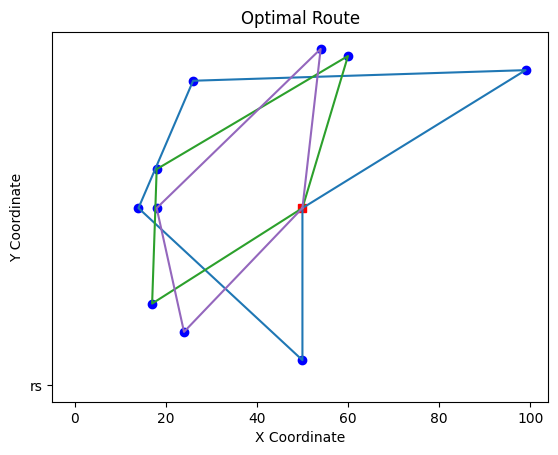

In [27]:

def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof
if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results;
    main()